In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 11.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS, add_constant
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr, f_oneway
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
from statsmodels.api import add_constant
from scipy.stats import ttest_ind, mannwhitneyu
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Project/Checkpoint 4.csv")

In [ ]:
df.isnull().sum()

,0
rating,0
title,0
text,0
asin,0
parent_asin,0
user_id,0
helpful_vote,0
verified_purchase,0
processed_text,0
sentiment,0


In [ ]:
df.isna().sum()

,0
rating,0
title,0
text,0
asin,0
parent_asin,0
user_id,0
helpful_vote,0
verified_purchase,0
processed_text,0
sentiment,0


In [ ]:
len(df)

21640855

In [ ]:
selected_columns = [
    'rating', 'asin', 'parent_asin', 'user_id', 'helpful_vote',
    'verified_purchase', 'sentiment', 'month', 'polarity',
    'subjectivity', 'text_length', 'previous_rating'
]

df_updated = deepcopy(df[selected_columns])

In [ ]:
len(df_updated)

21640855

Reading Data and Selecting the Columns

In [ ]:

# df = pd.read_csv("/home/sanyam/arunoday/Assignment/data_science/Checkpoint 4.csv")

# # List of columns to select
# selected_columns = [
#     'rating', 'asin', 'parent_asin', 'user_id', 'helpful_vote',
#     'verified_purchase', 'sentiment', 'month', 'polarity',
#     'subjectivity', 'text_length', 'previous_rating'
# ]

# # Selecting the specified columns
# df_updated = df[selected_columns]
# df_updated.dropna(inplace=True)
# # df_updated = df_updated.fillna(0)
# df_updated

/tmp/ipykernel_1899234/2268000156.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.dropna(inplace=True)


,rating,asin,parent_asin,user_id,helpful_vote,verified_purchase,sentiment,month,polarity,subjectivity,text_length,previous_rating
1,5.0,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,True,Positive,2020-04,0.550000,0.750000,71,5.0
2,5.0,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1,True,Positive,2020-04,0.408333,0.612821,258,5.0
3,5.0,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,True,Positive,2020-02,0.500000,1.000000,8,5.0
4,5.0,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,7,True,Positive,2020-02,0.800000,0.750000,34,5.0
5,5.0,B07R2X568B,B0BG8M4XW7,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,True,Neutral,2020-02,0.000000,0.000000,11,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18857667,5.0,B07STV3D8C,B07STV3D8C,AELOWBMIEQXAFMU3NGHHQVEPUWGA,0,True,Positive,2021-03,0.600000,0.610000,122,5.0
18857668,5.0,B08KKZC8TH,B08861H88Q,AFBPY3MEKF36N54PN6IHLN6ZXTAQ,0,True,Negative,2021-09,-0.033333,0.566667,45,5.0
18857669,1.0,B08LV6JN92,B09NB4GVDG,AFBPY3MEKF36N54PN6IHLN6ZXTAQ,0,True,Negative,2021-09,-0.572222,0.800000,85,5.0
18857670,3.0,B078T2PLB9,B0B9LKXMRP,AFBPY3MEKF36N54PN6IHLN6ZXTAQ,0,True,Positive,2021-07,0.053704,0.609877,262,1.0


Encoding the Sentiment

In [ ]:
# Display unique values before encoding
print("\nUnique values in 'sentiment' before encoding:")
print(df_updated['sentiment'].unique())

# Import LabelEncoder
# from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column
df_updated['sentiment_encoded'] = label_encoder.fit_transform(df_updated['sentiment'])
df_updated['verified_purchase'] = label_encoder.fit_transform(df_updated['verified_purchase'])

# Create a mapping of labels to encoded values
sentiment_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Verify the encoding
print("\nSentiment mapping:")
print(sentiment_mapping)


print("\n'sentiment' after encoding:")
print(df_updated[['sentiment', 'sentiment_encoded']])


Unique values in 'sentiment' before encoding:
['Positive' 'Neutral' 'Negative']

Sentiment mapping:
{False: 0, True: 1}

'sentiment' after encoding:
         sentiment  sentiment_encoded
0         Positive                  2
1         Positive                  2
2         Positive                  2
3         Positive                  2
4         Positive                  2
...            ...                ...
21640850  Positive                  2
21640851  Positive                  2
21640852  Positive                  2
21640853  Positive                  2
21640854   Neutral                  1

[21640855 rows x 2 columns]


In [ ]:
df_updated

,rating,asin,parent_asin,user_id,helpful_vote,verified_purchase,sentiment,month,polarity,subjectivity,text_length,previous_rating,sentiment_encoded
0,5.0,B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,Positive,2020-04,0.866667,0.833333,38,NaN,2
1,5.0,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,Positive,2020-04,0.550000,0.750000,71,5.0,2
2,5.0,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1,1,Positive,2020-04,0.408333,0.612821,258,5.0,2
3,5.0,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,Positive,2020-02,0.500000,1.000000,8,5.0,2
4,5.0,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,7,1,Positive,2020-02,0.800000,0.750000,34,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640850,5.0,B005DJD2TE,B005DJD2TE,AHMG25IFANOI2QOZSMYN4OFATARQ,0,1,Positive,2014-06,0.383333,0.333333,152,1.0,2
21640851,5.0,B005DL24JQ,B005DL24JQ,AE477AI63KSB6DM2MJCW5JORWMOQ,2,0,Positive,2013-04,0.102813,0.590417,129,5.0,2
21640852,4.0,B005DL24JQ,B005DL24JQ,AE2W4AVOENOKJOF3OGP2X3U426XA,0,1,Positive,2015-09,0.248636,0.530909,420,5.0,2
21640853,2.0,B005DL24JQ,B005DL24JQ,AFI6OPOZQEJZ7WZVUDHJZMZTLYJA,0,0,Positive,2016-04,0.173310,0.522145,405,4.0,2


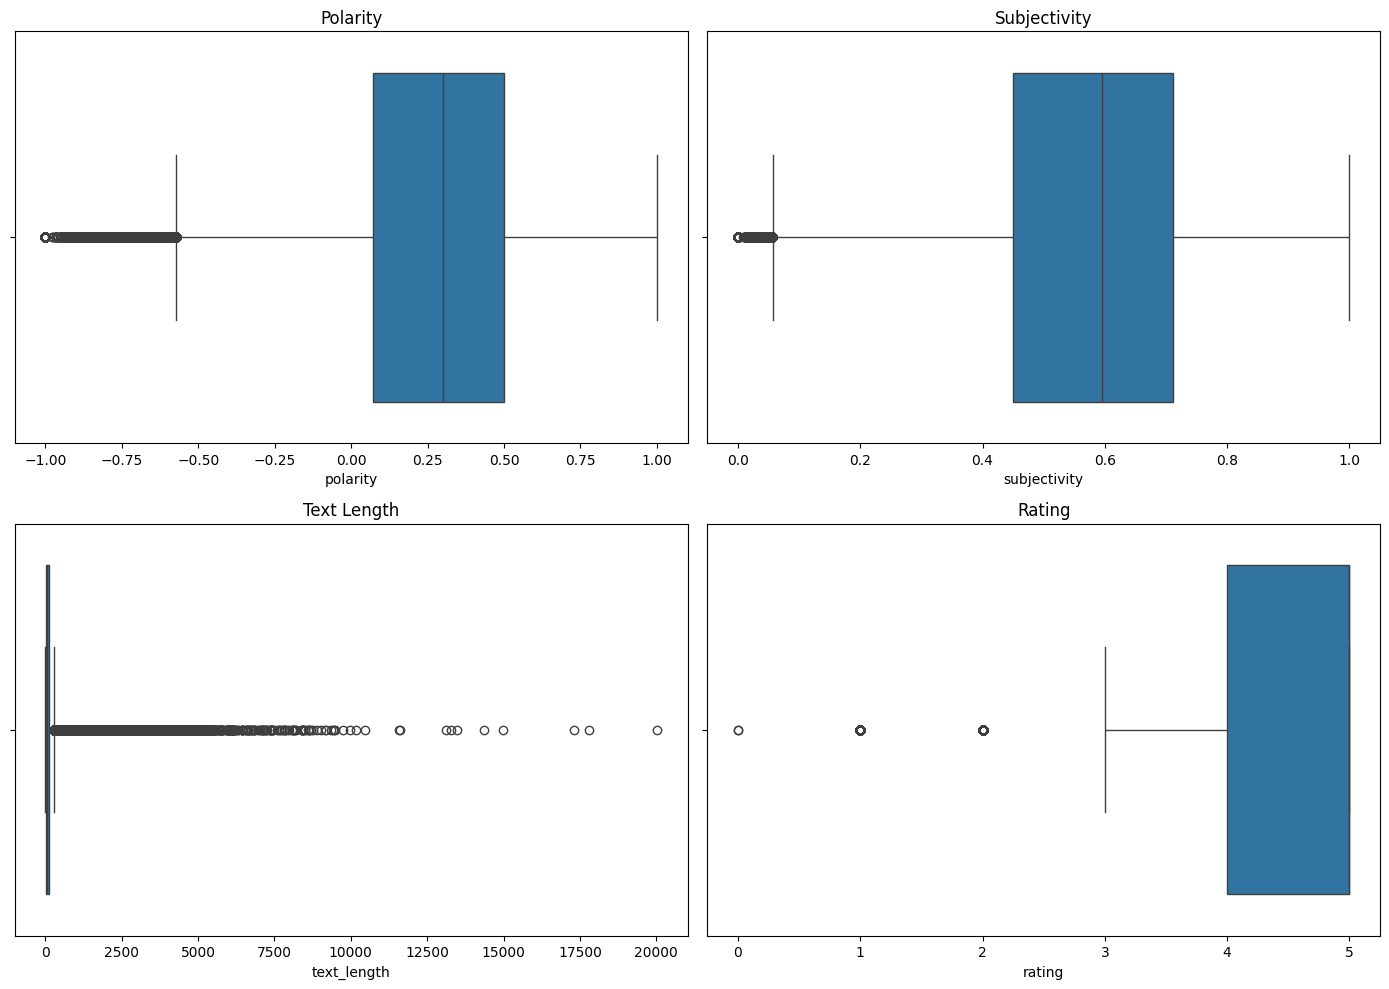

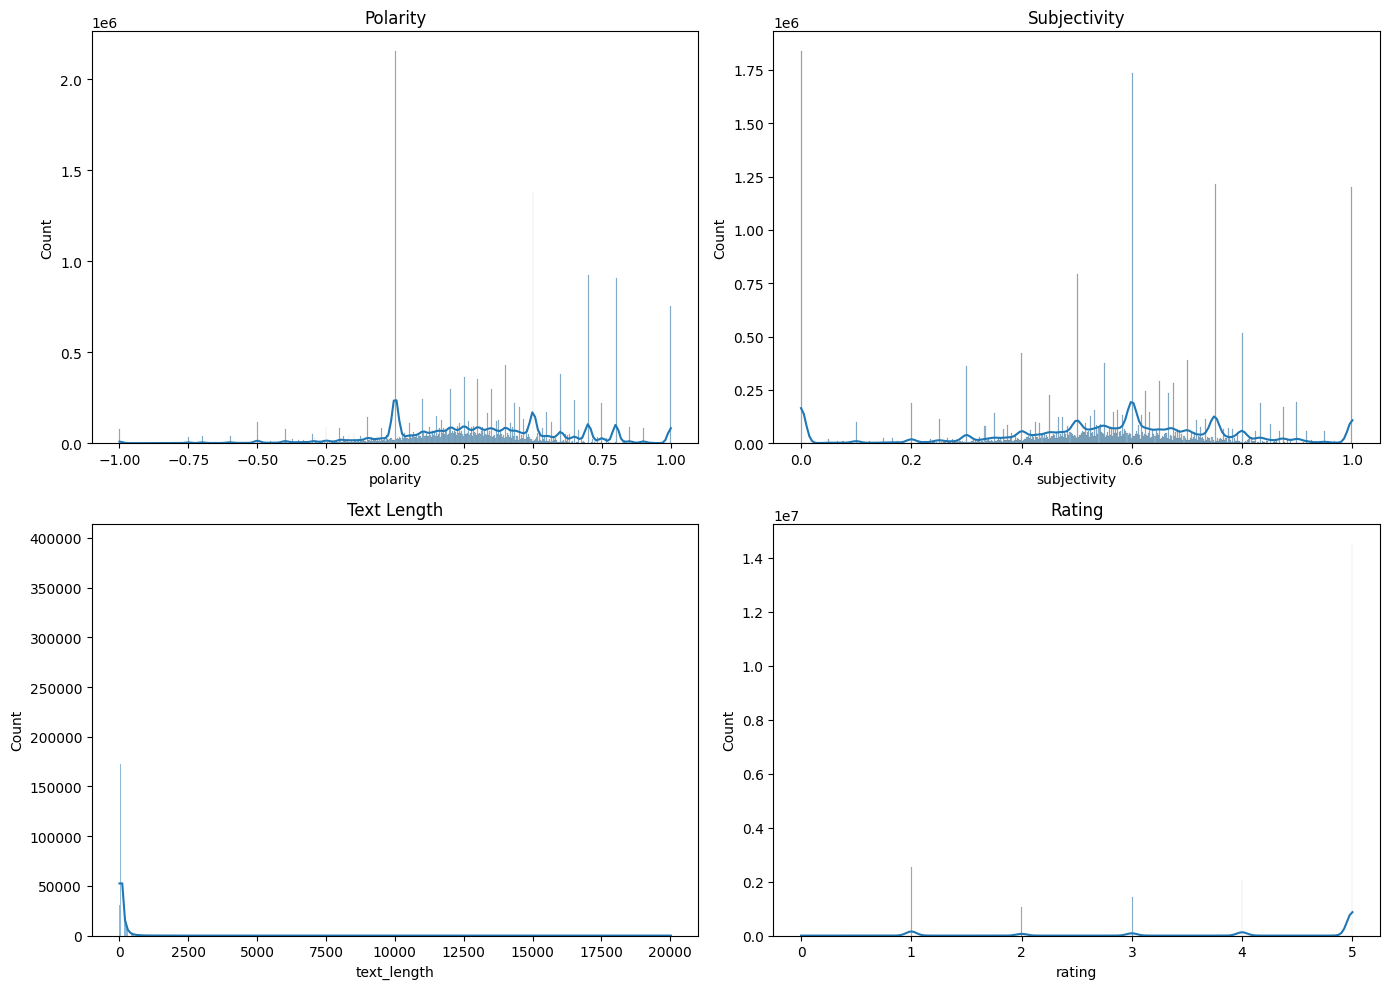

In [ ]:
# Boxplots to visualize outlier handling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(data=df, x='polarity', ax=axes[0, 0])
sns.boxplot(data=df, x='subjectivity', ax=axes[0, 1])
sns.boxplot(data=df, x='text_length', ax=axes[1, 0])
sns.boxplot(data=df, x='rating', ax=axes[1, 1])
axes[0, 0].set_title('Polarity')
axes[0, 1].set_title('Subjectivity')
axes[1, 0].set_title('Text Length')
axes[1, 1].set_title('Rating')
plt.tight_layout()
plt.show()

# Histograms to check distribution after outlier handling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['polarity'], kde=True, ax=axes[0, 0])
sns.histplot(df['subjectivity'], kde=True, ax=axes[0, 1])
sns.histplot(df['text_length'], kde=True, ax=axes[1, 0])
sns.histplot(df['rating'], kde=True, ax=axes[1, 1])
axes[0, 0].set_title('Polarity')
axes[0, 1].set_title('Subjectivity')
axes[1, 0].set_title('Text Length')
axes[1, 1].set_title('Rating')
plt.tight_layout()
plt.show()


In [ ]:
len(df)

21640855

Removing the Outliers

In [ ]:
#Code for Removing the OutLiers. Use When Needed


# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     # Filter out the outliers
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     outliers_count = outliers.shape[0]
#     return df_no_outliers, outliers_count

# # Copy the original DataFrame to avoid modifying it directly
# df_updated = df.copy()
# total_outliers = 0

# # Removing outliers for each column in place and counting them
# for column in ['polarity', 'subjectivity', 'text_length', 'rating']:
#     original_rows = df_updated.shape[0]
#     df_updated, outliers_removed = remove_outliers_iqr(df_updated, column)
#     total_outliers += outliers_removed
#     print(f"Outliers removed in '{column}': {outliers_removed}")

# print("\nTotal outliers removed across all columns:", total_outliers)
# print("DataFrame after removing outliers using the IQR method:")
# print(df_updated.describe())


In [ ]:
df_updated

,rating,asin,parent_asin,user_id,helpful_vote,verified_purchase,sentiment,month,polarity,subjectivity,text_length,previous_rating,sentiment_encoded
0,5.0,B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,Positive,2020-04,0.866667,0.833333,38,NaN,2
1,5.0,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,Positive,2020-04,0.550000,0.750000,71,5.0,2
2,5.0,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1,1,Positive,2020-04,0.408333,0.612821,258,5.0,2
3,5.0,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,Positive,2020-02,0.500000,1.000000,8,5.0,2
4,5.0,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,7,1,Positive,2020-02,0.800000,0.750000,34,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640850,5.0,B005DJD2TE,B005DJD2TE,AHMG25IFANOI2QOZSMYN4OFATARQ,0,1,Positive,2014-06,0.383333,0.333333,152,1.0,2
21640851,5.0,B005DL24JQ,B005DL24JQ,AE477AI63KSB6DM2MJCW5JORWMOQ,2,0,Positive,2013-04,0.102813,0.590417,129,5.0,2
21640852,4.0,B005DL24JQ,B005DL24JQ,AE2W4AVOENOKJOF3OGP2X3U426XA,0,1,Positive,2015-09,0.248636,0.530909,420,5.0,2
21640853,2.0,B005DL24JQ,B005DL24JQ,AFI6OPOZQEJZ7WZVUDHJZMZTLYJA,0,0,Positive,2016-04,0.173310,0.522145,405,4.0,2


In [ ]:
df = deepcopy(df_updated)

In [ ]:
len(df)

21640855

In [ ]:
# Assuming `df` is the entire dataset with columns 'polarity' and 'subjectivity'

# Calculate the mean and variance for polarity and subjectivity in the entire dataset
population_mean_polarity = df['polarity'].mean()
population_variance_polarity = df['polarity'].var()

population_mean_subjectivity = df['subjectivity'].mean()
population_variance_subjectivity = df['subjectivity'].var()

population_mean_text_length = df['text_length'].mean()
population_variance_text_length = df['text_length'].var()

population_mean_rating = df['rating'].mean()
population_variance_rating = df['rating'].var()

print("Population Statistics:")
print(f"Mean Polarity: {population_mean_polarity}")
print(f"Variance Polarity: {population_variance_polarity}")
print(f"Mean Subjectivity: {population_mean_subjectivity}")
print(f"Variance Subjectivity: {population_variance_subjectivity}")
print(f"Mean text_length: {population_mean_text_length}")
print(f"Variance text_length: {population_variance_text_length}")
print(f"Mean rating: {population_mean_rating}")
print(f"Variance rating: {population_variance_rating}")


Population Statistics:
Mean Polarity: 0.30762326043829746
Variance Polarity: 0.10854940993638211
Mean Subjectivity: 0.5552326702585966
Variance Subjectivity: 0.060557588831360296
Mean text_length: 102.62380012249979
Variance text_length: 19283.190256162205
Mean rating: 4.1535269285802245
Variance rating: 1.9721751203548126


In [ ]:
len(df)

21640855

In [ ]:
# Draw a 10% random sample of the data
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
sample_df = df.sample(frac=0.01, random_state=42)  # Adjust the fraction as needed
print("\nSample Data:")
print(sample_df.head())


Sample Data:
          rating        asin parent_asin                       user_id  \
790975       3.0  B0124EMEY4  B0124EMEY4  AFSYRG7D4UYF4XH3HUEOD7MGI7SA   
19211068     5.0  B000EUHKUE  B082RPF719  AGDAF6PSNXB5BBCKDLFDVY2LAI3A   
17433356     4.0  B01GIVOZGE  B01GIVOZGE  AGRKIF5LTSPEJ4T3K3UUF5TZIZUA   
389590       3.0  B07G2T9GZ1  B07G2T9GZ1  AH635DTHDKOYEMDZQ2ALOYHA3B7Q   
1121202      5.0  B00MH1CTEA  B00MH1CTEA  AHEYDUAR6XXJZDRJULCIZCTIEIXA   

          helpful_vote  verified_purchase sentiment      month  polarity  \
790975               0                  1   Neutral 2016-04-01  0.000000   
19211068             0                  1  Positive 2018-03-01  1.000000   
17433356             0                  0  Positive 2016-06-01  0.358333   
389590               0                  1  Positive 2021-03-01  0.250000   
1121202              0                  1  Positive 2020-06-01  0.442500   

          subjectivity  text_length  previous_rating  sentiment_encoded  
790975    

In [ ]:
len(df), len(sample_df)

(21640855, 216409)

Hypothesis for Polarity

Null Hypothesis (
𝐻
0
H
0
​
 ): The mean polarity of the sample is equal to the mean polarity of the population.

Alternative Hypothesis (
𝐻
𝑎
H
a
​
 ): The mean polarity of the sample is significantly different from the mean polarity of the population.


Hypothesis for Subjectivity

Null Hypothesis (
𝐻
0
H
0
​
 ): The mean subjectivity of the sample is equal to the mean subjectivity of the population.

Alternative Hypothesis (
𝐻
𝑎
H
a
​
 ): The mean subjectivity of the sample is significantly different from the mean subjectivity of the population.

In [ ]:


# Perform one-sample t-test for polarity
t_stat_polarity, p_value_polarity = ttest_1samp(sample_df['polarity'], population_mean_polarity)

# Perform one-sample t-test for subjectivity
t_stat_subjectivity, p_value_subjectivity = ttest_1samp(sample_df['subjectivity'], population_mean_subjectivity)

print("\nHypothesis Testing Results:")
print(f"Polarity: t-statistic = {t_stat_polarity}, p-value = {p_value_polarity}")
print(f"Subjectivity: t-statistic = {t_stat_subjectivity}, p-value = {p_value_subjectivity}")

# Interpretation
alpha = 0.05
if p_value_polarity < alpha:
    print("For Polarity: Reject the null hypothesis - Sample mean is significantly different from population mean.")
else:
    print("For Polarity: Fail to reject the null hypothesis - Sample mean is not significantly different from population mean.")

if p_value_subjectivity < alpha:
    print("For Subjectivity: Reject the null hypothesis - Sample mean is significantly different from population mean.")
else:
    print("For Subjectivity: Fail to reject the null hypothesis - Sample mean is not significantly different from population mean.")



Hypothesis Testing Results:
Polarity: t-statistic = -0.6164656373313746, p-value = 0.5375878928957729
Subjectivity: t-statistic = -1.3750314164845718, p-value = 0.1691231285432336
For Polarity: Fail to reject the null hypothesis - Sample mean is not significantly different from population mean.
For Subjectivity: Fail to reject the null hypothesis - Sample mean is not significantly different from population mean.


1. Hypothesis Test for Trend
Hypothesis:

Null Hypothesis (
𝐻
0
H
0
​
 ): There is no upward trend in the number of reviews over time.
Alternative Hypothesis (
𝐻
𝑎
H
a
​
 ): There is a significant upward trend in the number of reviews over time.

In [ ]:


# Aggregate review counts by month for the entire dataset
monthly_review_counts = df.groupby(df['month'].dt.to_period('M')).size().reset_index(name='review_count')
monthly_review_counts['month'] = monthly_review_counts['month'].dt.to_timestamp()  # Convert back to timestamp

# Calculate mean and variance for monthly review counts over the entire dataset
population_mean_review_count = monthly_review_counts['review_count'].mean()
population_variance_review_count = monthly_review_counts['review_count'].var()

print("Population Statistics for Monthly Review Counts:")
print(f"Mean: {population_mean_review_count}")
print(f"Variance: {population_variance_review_count}")

Population Statistics for Monthly Review Counts:
Mean: 77565.78853046594
Variance: 9868125762.311235


In [ ]:
# Draw a 50% random sample of the monthly review counts data
sample_monthly_review_counts = monthly_review_counts.sample(frac=0.01, random_state=42)
print("\nSample Data for Monthly Review Counts:")
print(sample_monthly_review_counts.head())



Sample Data for Monthly Review Counts:
         month  review_count
30  2003-01-01           138
126 2011-01-01         10161
199 2017-02-01        133007



Linear Regression Summary on Sample Data:
                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2.859
Date:                Sun, 03 Nov 2024   Prob (F-statistic):              0.340
Time:                        15:08:14   Log-Likelihood:                -35.258
No. Observations:                   3   AIC:                             74.52
Df Residuals:                       1   BIC:                             72.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


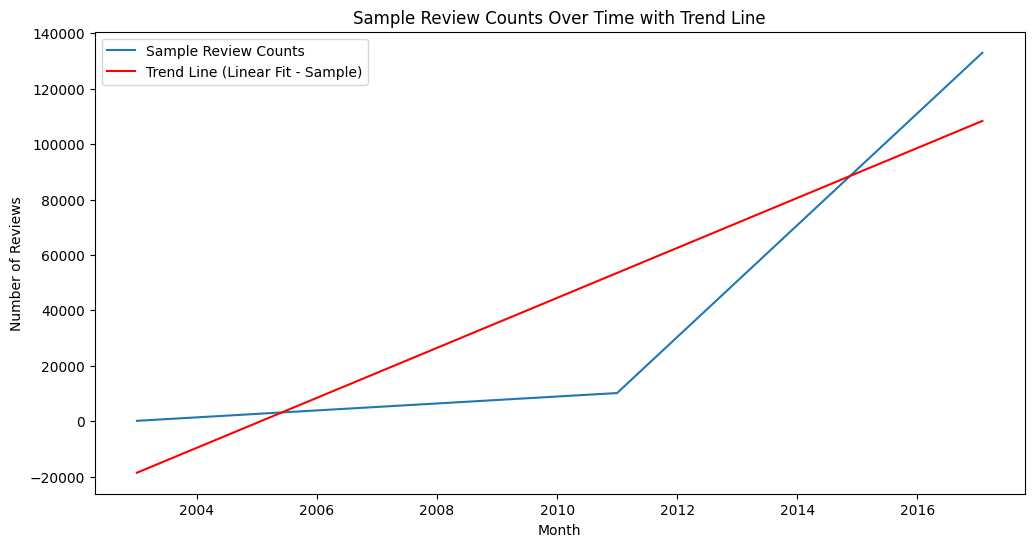

In [ ]:


# Create a new column for months since the start in the sample data for linear regression
sample_monthly_review_counts['months_since_start'] = (sample_monthly_review_counts['month'] - sample_monthly_review_counts['month'].min()).dt.days / 30

# Perform linear regression on the sample data
X_sample = add_constant(sample_monthly_review_counts['months_since_start'])  # Add constant for intercept
y_sample = sample_monthly_review_counts['review_count']
model_sample = OLS(y_sample, X_sample).fit()

# Print the model summary
print("\nLinear Regression Summary on Sample Data:")
print(model_sample.summary())

# Extract the slope and p-value for the hypothesis test
slope_sample = model_sample.params['months_since_start']
p_value_sample = model_sample.pvalues['months_since_start']

print(f"Slope (Sample): {slope_sample}")
print(f"P-value for trend test (Sample): {p_value_sample}")

# Interpret the hypothesis test
alpha = 0.05
if p_value_sample < alpha:
    print("Reject the null hypothesis: There is a significant upward trend in the number of reviews over time in the sample.")
else:
    print("Fail to reject the null hypothesis: No significant trend detected in the number of reviews over time in the sample.")

# Plot the review counts and the trend line for the sample data
plt.figure(figsize=(12, 6))
plt.plot(sample_monthly_review_counts['month'], sample_monthly_review_counts['review_count'], label='Sample Review Counts')
plt.plot(sample_monthly_review_counts['month'], model_sample.predict(X_sample), color='red', label='Trend Line (Linear Fit - Sample)')
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Sample Review Counts Over Time with Trend Line")
plt.legend()
plt.show()


Hypothesis Testing
Objective:
To determine if there are statistically significant differences in the average text length among the three sentiment categories (Positive, Neutral, and Negative).

Hypothesis:
Null Hypothesis (
𝐻
0
H
0
​
 ): The mean text length is the same across the three sentiment categories.

𝜇
Positive
=
𝜇
Neutral
=
𝜇
Negative
μ
Positive
​
 =μ
Neutral
​
 =μ
Negative
​

Alternative Hypothesis (
𝐻
𝑎
H
a
​
 ): At least one sentiment category has a different mean text length.

Test Selection:
Since we are comparing the means of three independent groups, an ANOVA (Analysis of Variance) test is appropriate for this hypothesis test.


ANOVA Test Results for Text Length by Sentiment (Sample Data):
                    sum_sq        df           F  PR(>F)
C(sentiment)  1.090236e+08       2.0  2876.29337     0.0
Residual      4.101349e+09  216406.0         NaN     NaN
Reject the null hypothesis: There is a significant difference in text length among sentiment categories in the sample.


<ipython-input-25-df4c0bcbd707>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



Post-hoc Test (Tukey HSD) Results on Sample Data:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper   reject
---------------------------------------------------------
Negative  Neutral -75.7164    0.0 -78.736 -72.6968   True
Negative Positive  -0.4163 0.8973 -2.6164   1.7838  False
 Neutral Positive  75.3001    0.0 72.9551  77.6451   True
---------------------------------------------------------


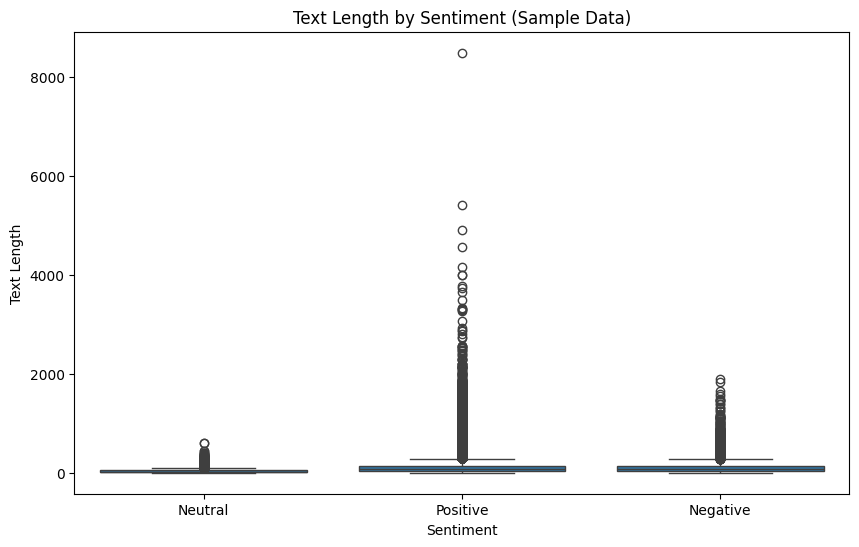

In [ ]:
# Step 2: Perform ANOVA on the sample
model = ols('text_length ~ C(sentiment)', data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Test Results for Text Length by Sentiment (Sample Data):")
print(anova_table)

# Interpret the p-value
alpha = 0.05
p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in text length among sentiment categories in the sample.")
else:
    print("Fail to reject the null hypothesis: No significant difference in text length among sentiment categories in the sample.")

# Step 3: Post-hoc Test (Tukey HSD) if ANOVA is significant
if p_value < alpha:
    tukey = pairwise_tukeyhsd(sample_df['text_length'], sample_df['sentiment'], alpha=0.05)
    print("\nPost-hoc Test (Tukey HSD) Results on Sample Data:")
    print(tukey)

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=sample_df)
plt.title('Text Length by Sentiment (Sample Data)')
plt.xlabel("Sentiment")
plt.ylabel("Text Length")
plt.show()

<ipython-input-26-4609856d5130>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='text_length', data=mean_text_length, palette='viridis')


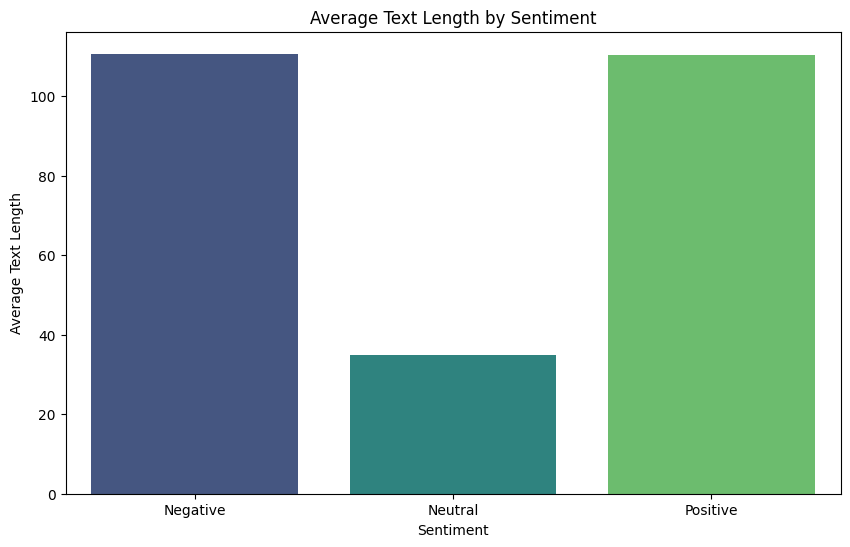

In [ ]:
# Assuming `df` is your DataFrame with 'sentiment' and 'text_length' columns

# Calculate the mean text length for each sentiment category
mean_text_length = sample_df.groupby('sentiment')['text_length'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='text_length', data=mean_text_length, palette='viridis')
plt.title('Average Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Text Length')
plt.show()


Hypotheses
Hypothesis 1: Do longer reviews receive more helpful votes on average?
Null Hypothesis (
𝐻
0
H
0
​
 ): There is no significant relationship between text_length and helpful_vote.
Alternative Hypothesis (
𝐻
𝑎
H
a
​
 ): There is a significant relationship between text_length and helpful_vote.
To test this hypothesis, we can use correlation analysis (e.g., Pearson correlation) to determine if there is a statistically significant association between text length and the number of helpful votes.

Hypothesis 2: Do Positive reviews receive more helpful votes on average than Neutral and Negative reviews?
Null Hypothesis (
𝐻
0
H
0
​
 ): The mean number of helpful votes is the same across Positive, Neutral, and Negative reviews.

𝜇
Positive
=
𝜇
Neutral
=
𝜇
Negative
μ
Positive
​
 =μ
Neutral
​
 =μ
Negative
​

Alternative Hypothesis (
𝐻
𝑎
H
a
​
 ): At least one sentiment category has a different mean number of helpful votes.

To test this hypothesis, we can use ANOVA (Analysis of Variance) to compare the means of helpful votes across the three sentiment groups.

In [ ]:


# Assuming `df` is your DataFrame with 'text_length', 'helpful_vote', and 'sentiment' columns

# Hypothesis 1: Correlation between text_length and helpful_vote
print("Hypothesis 1: Correlation Test between Text Length and Helpful Votes")
correlation, p_value_corr = pearsonr(sample_df['text_length'], sample_df['helpful_vote'])
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Interpretation for Hypothesis 1
alpha = 0.05
if p_value_corr < alpha:
    print("Reject the null hypothesis: There is a significant relationship between text length and helpful votes.\n")
else:
    print("Fail to reject the null hypothesis: No significant relationship between text length and helpful votes.\n")

# Hypothesis 2: ANOVA test for helpful votes across sentiment categories
print("Hypothesis 2: ANOVA Test for Helpful Votes by Sentiment Category")
anova_results = f_oneway(
    sample_df[sample_df['sentiment'] == 'Positive']['helpful_vote'],
    sample_df[sample_df['sentiment'] == 'Neutral']['helpful_vote'],
    sample_df[sample_df['sentiment'] == 'Negative']['helpful_vote']
)

print(f"F-statistic: {anova_results.statistic:.4f}")
print(f"P-value: {anova_results.pvalue:.4f}")

# Interpretation for Hypothesis 2
if anova_results.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in helpful votes across sentiment categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in helpful votes across sentiment categories.")


Hypothesis 1: Correlation Test between Text Length and Helpful Votes
Pearson Correlation: 0.1332
P-value: 0.0000
Reject the null hypothesis: There is a significant relationship between text length and helpful votes.

Hypothesis 2: ANOVA Test for Helpful Votes by Sentiment Category
F-statistic: 25.8256
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in helpful votes across sentiment categories.


Hypothesis 1: Change in Sentiment Polarity Over Time
Hypothesis: Has the average sentiment polarity changed over time?

Null Hypothesis (𝐻0): The mean sentiment polarity has not changed significantly over time.

Alternative Hypothesis (𝐻𝑎): The mean sentiment polarity has changed significantly over time.

To test this hypothesis, we can split the data into two time periods (e.g., before 2010 and after 2010) and compare the mean polarity for these two periods using a two-sample t-test.


If either the t-test p-value is below 0.05, we conclude that there is a significant change in polarity over time.

In [ ]:


# Split the data into two periods: before 2010 and after 2010
sample_df['time'] = pd.to_datetime(sample_df['month'])
df_before_2010 = sample_df[sample_df['time'] < '2010']['polarity']
df_after_2010 = sample_df[sample_df['time'] >= '2010']['polarity']

# Check for normality (optional)
# If normally distributed, we can use a t-test; if not, use Mann-Whitney U test
_, p_value_ttest = ttest_ind(df_before_2010, df_after_2010)
_, p_value_mannwhitney = mannwhitneyu(df_before_2010, df_after_2010)

print("Hypothesis 1: Change in Sentiment Polarity Over Time")
print(f"Two-sample t-test p-value: {p_value_ttest}")
print(f"Mann-Whitney U test p-value: {p_value_mannwhitney}")

if p_value_ttest < 0.05:
    print("Reject the null hypothesis (t-test): There is a significant change in sentiment polarity over time.")
else:
    print("Fail to reject the null hypothesis (t-test): No significant change in sentiment polarity over time.")

if p_value_mannwhitney < 0.05:
    print("Reject the null hypothesis (Mann-Whitney): There is a significant change in sentiment polarity over time.")
else:
    print("Fail to reject the null hypothesis (Mann-Whitney): No significant change in sentiment polarity over time.")


Hypothesis 1: Change in Sentiment Polarity Over Time
Two-sample t-test p-value: 3.263476265401333e-08
Mann-Whitney U test p-value: 2.1476509631284117e-11
Reject the null hypothesis (t-test): There is a significant change in sentiment polarity over time.
Reject the null hypothesis (Mann-Whitney): There is a significant change in sentiment polarity over time.


Hypothesis 2: Difference in Polarity Across Sentiment Categories
Hypothesis: Is there a significant difference in sentiment polarity across the three sentiment categories (Positive, Neutral, Negative)?
Null Hypothesis (
𝐻
0
H
0
​
 ): The mean polarity is the same across Positive, Neutral, and Negative categories.
Alternative Hypothesis (
𝐻
𝑎
H
a
​
 ): At least one category has a significantly different mean polarity.
We can test this hypothesis using ANOVA (Analysis of Variance) to compare the mean polarity across the three sentiment groups.

In [ ]:
from scipy.stats import f_oneway

# Group data by sentiment and extract polarity values
polarity_positive = sample_df[sample_df['sentiment'] == 'Positive']['polarity']
polarity_neutral = sample_df[sample_df['sentiment'] == 'Neutral']['polarity']
polarity_negative = sample_df[sample_df['sentiment'] == 'Negative']['polarity']

# Perform ANOVA
anova_result = f_oneway(polarity_positive, polarity_neutral, polarity_negative)

print("\nHypothesis 2: Difference in Polarity Across Sentiment Categories")
print(f"ANOVA p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in polarity across sentiment categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in polarity across sentiment categories.")



Hypothesis 2: Difference in Polarity Across Sentiment Categories
ANOVA p-value: 0.0
Reject the null hypothesis: There is a significant difference in polarity across sentiment categories.


Hypothesis Testing for Chi-Square Test of Independence

Objective: To test if there is an association between sentiment (e.g., Positive, Neutral, Negative) and verified purchase status (Verified, Not Verified) in the sample data.

Hypotheses

Null Hypothesis (𝐻0): There is no association between sentiment and verified_purchase status. In other words, the two variables are independent.

This means that the distribution of verified_purchase status (Verified or Not Verified) is the same across all sentiment categories.

Alternative Hypothesis (𝐻𝑎): There is an association between sentiment and verified_purchase status. In other words, the two variables are not independent.

This means that the distribution of verified_purchase status varies by sentiment category, suggesting that one variable may influence the other.

In [ ]:
# Step 2: Create a Contingency Table on the Sample Data
contingency_table = pd.crosstab(sample_df['sentiment'], sample_df['verified_purchase'])
print("\nContingency Table (Sample Data):")
print(contingency_table)

# Step 3: Perform Chi-Square Test on the Sample Data
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 4: Output Results
print("\nChi-Square Test Results (Sample Data):")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table (Sample Data):")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between sentiment and review verification status in the sample.")
else:
    print("\nFail to reject the null hypothesis: No significant association between sentiment and review verification status in the sample.")


Contingency Table (Sample Data):
verified_purchase      0       1
sentiment                       
Negative            2180   22432
Neutral             1054   20242
Positive           15226  155275

Chi-Square Test Results (Sample Data):
Chi-Square Statistic: 388.3201166194145
P-value: 4.7572729518203127e-85
Degrees of Freedom: 2
Expected Frequencies Table (Sample Data):
[[  2099.4391176   22512.5608824 ]
 [  1816.57953227  19479.42046773]
 [ 14543.98135013 155957.01864987]]

Reject the null hypothesis: There is a significant association between sentiment and review verification status in the sample.


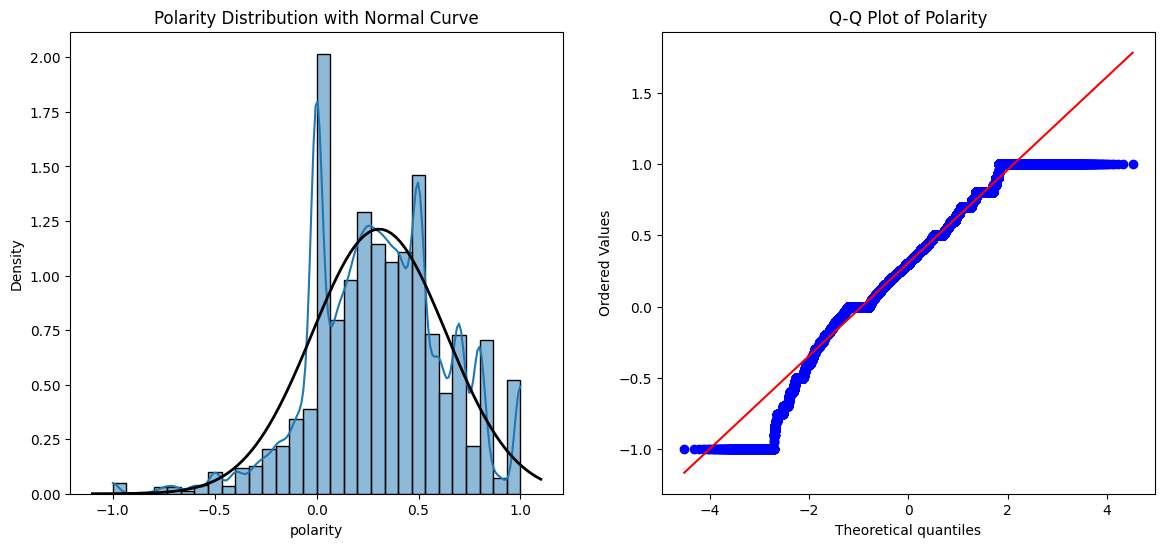

Shapiro-Wilk Test:
Statistic = 0.9829552238488151, p-value = 1.470461401755795e-81

Kolmogorov-Smirnov Test:
Statistic = 0.061763285110117055, p-value = 0.0

Anderson-Darling Test:
Statistic = 569.9052701017063
Critical Values and Significance Levels:
Critical Value: 0.576, Significance Level: 15.0%
Critical Value: 0.656, Significance Level: 10.0%
Critical Value: 0.787, Significance Level: 5.0%
Critical Value: 0.918, Significance Level: 2.5%
Critical Value: 1.092, Significance Level: 1.0%

Shapiro-Wilk Test: Reject the null hypothesis. Polarity is not normally distributed.
Kolmogorov-Smirnov Test: Reject the null hypothesis. Polarity is not normally distributed.
Anderson-Darling Test: Reject the null hypothesis. Polarity is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 216409.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, anderson, norm, probplot

# Assuming df is your DataFrame with a 'polarity' column containing fractional values

# Step 1: Visual Inspection with Histogram and Q-Q Plot
plt.figure(figsize=(14, 6))

# Histogram with Normal Curve
plt.subplot(1, 2, 1)
sns.histplot(sample_df['polarity'], kde=True, stat="density", bins=30)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, sample_df['polarity'].mean(), sample_df['polarity'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Polarity Distribution with Normal Curve')

# Q-Q Plot
plt.subplot(1, 2, 2)
probplot(sample_df['polarity'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Polarity')

plt.show()

# Step 2: Statistical Tests for Normality

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(sample_df['polarity'])
print("Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_stat}, p-value = {shapiro_p}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(sample_df['polarity'], 'norm', args=(sample_df['polarity'].mean(), sample_df['polarity'].std()))
print("\nKolmogorov-Smirnov Test:")
print(f"Statistic = {ks_stat}, p-value = {ks_p}")

# Anderson-Darling Test
anderson_result = anderson(sample_df['polarity'], dist='norm')
print("\nAnderson-Darling Test:")
print(f"Statistic = {anderson_result.statistic}")
print("Critical Values and Significance Levels:")
for cv, sl in zip(anderson_result.critical_values, anderson_result.significance_level):
    print(f"Critical Value: {cv}, Significance Level: {sl}%")

# Interpretation based on p-values and test statistic
alpha = 0.05
if shapiro_p < alpha:
    print("\nShapiro-Wilk Test: Reject the null hypothesis. Polarity is not normally distributed.")
else:
    print("\nShapiro-Wilk Test: Fail to reject the null hypothesis. Polarity may be normally distributed.")

if ks_p < alpha:
    print("Kolmogorov-Smirnov Test: Reject the null hypothesis. Polarity is not normally distributed.")
else:
    print("Kolmogorov-Smirnov Test: Fail to reject the null hypothesis. Polarity may be normally distributed.")

if anderson_result.statistic > anderson_result.critical_values[2]:  # Compare with 5% significance level
    print("Anderson-Darling Test: Reject the null hypothesis. Polarity is not normally distributed.")
else:
    print("Anderson-Darling Test: Fail to reject the null hypothesis. Polarity may be normally distributed.")

In [ ]:
len(df)

21640855

In [ ]:
len(sample_df)

216409

In [ ]:
sample_df.to_csv('/content/drive/MyDrive/Data Science Project/samples.csv')

In [ ]:
df.describe()

,rating,helpful_vote,verified_purchase,month,polarity,subjectivity,text_length,previous_rating,sentiment_encoded
count,2.164086e+07,2.164086e+07,2.164086e+07,21640855,2.164086e+07,2.164086e+07,2.164086e+07,2.164085e+07,2.164086e+07
mean,4.153527e+00,9.484180e-01,9.153102e-01,2019-04-13 19:15:27.088302848,3.076233e-01,5.552327e-01,1.026238e+02,4.153527e+00,1.675359e+00
min,0.000000e+00,-1.000000e+00,0.000000e+00,2000-06-01 00:00:00,-1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00,1.000000e+00,2017-06-01 00:00:00,7.117347e-02,4.500000e-01,2.800000e+01,4.000000e+00,2.000000e+00
50%,5.000000e+00,0.000000e+00,1.000000e+00,2019-12-01 00:00:00,3.000000e-01,5.959280e-01,6.300000e+01,5.000000e+00,2.000000e+00
75%,5.000000e+00,0.000000e+00,1.000000e+00,2021-07-01 00:00:00,5.000000e-01,7.122449e-01,1.250000e+02,5.000000e+00,2.000000e+00
max,5.000000e+00,2.788300e+04,1.000000e+00,2023-09-01 00:00:00,1.000000e+00,1.000000e+00,2.002200e+04,5.000000e+00,2.000000e+00
std,1.404342e+00,1.405005e+01,2.784195e-01,NaN,3.294684e-01,2.460845e-01,1.388639e+02,1.404342e+00,6.675812e-01


In [ ]:
sample_df.describe()

,rating,helpful_vote,verified_purchase,month,polarity,subjectivity,text_length,previous_rating,sentiment_encoded,time
count,216409.000000,216409.000000,216409.000000,216409,216409.000000,216409.000000,216409.000000,216409.000000,216409.000000,216409
mean,4.151454,0.960501,0.914699,2019-04-08 04:23:38.447476480,0.307187,0.554506,102.923515,4.152443,1.674136,2019-04-08 04:23:38.447476480
min,1.000000,0.000000,0.000000,2001-07-01 00:00:00,-1.000000,0.000000,1.000000,1.000000,0.000000,2001-07-01 00:00:00
25%,4.000000,0.000000,1.000000,2017-05-01 00:00:00,0.070312,0.450000,28.000000,4.000000,2.000000,2017-05-01 00:00:00
50%,5.000000,0.000000,1.000000,2019-12-01 00:00:00,0.300000,0.594444,63.000000,5.000000,2.000000,2019-12-01 00:00:00
75%,5.000000,0.000000,1.000000,2021-07-01 00:00:00,0.500000,0.711111,126.000000,5.000000,2.000000,2021-07-01 00:00:00
max,5.000000,2678.000000,1.000000,2023-09-01 00:00:00,1.000000,1.000000,8491.000000,5.000000,2.000000,2023-09-01 00:00:00
std,1.404005,11.697358,0.279330,NaN,0.328930,0.245905,139.483752,1.404306,0.668683,NaN


In [ ]:
# Assuming `df` is the entire dataset with columns 'polarity' and 'subjectivity'

# Calculate the mean and variance for polarity and subjectivity in the entire dataset
sample_mean_polarity = sample_df['polarity'].mean()
sample_variance_polarity = sample_df['polarity'].var()

sample_mean_subjectivity = sample_df['subjectivity'].mean()
sample_variance_subjectivity = sample_df['subjectivity'].var()

sample_mean_text_length = sample_df['text_length'].mean()
sample_variance_text_length = sample_df['text_length'].var()

sample_mean_rating = sample_df['rating'].mean()
sample_variance_rating = sample_df['rating'].var()

print("Sample Statistics:")
print(f"Mean Polarity: {sample_mean_polarity}")
print(f"Variance Polarity: {sample_variance_polarity}")
print(f"Mean Subjectivity: {sample_mean_subjectivity}")
print(f"Variance Subjectivity: {sample_variance_subjectivity}")
print(f"Mean text_length: {sample_mean_text_length}")
print(f"Variance text_length: {sample_variance_text_length}")
print(f"Mean rating: {sample_mean_rating}")
print(f"Variance rating: {sample_variance_rating}")


Sample Statistics:
Mean Polarity: 0.3071873723920989
Variance Polarity: 0.10819507431460539
Mean Subjectivity: 0.5545058234814157
Variance Subjectivity: 0.06046942160146203
Mean text_length: 102.92351519576357
Variance text_length: 19455.71716398433
Mean rating: 4.151453959863037
Variance rating: 1.971230014655323


Hypothesis of Chi-square Goodness of Fit Test

To Test if the distribution of polarity is Gaussian or not.

Null Hypothesis (𝐻0): The polarity data is normally distributed.
Alternative Hypothesis (𝐻𝑎): The polarity data is not normally distributed.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare, norm
import matplotlib.pyplot as plt

# Assuming df is your full DataFrame with a 'polarity' column containing fractional values


# Step 2: Define the number of bins and calculate bin edges based on a normal distribution
num_bins = 10  # Adjust the number of bins as needed
polarity_mean = sample_df['polarity'].mean()
polarity_std = sample_df['polarity'].std()
bin_edges = np.linspace(sample_df['polarity'].min(), sample_df['polarity'].max(), num_bins + 1)

# Step 3: Calculate Observed Frequencies in the Sample
observed_frequencies, _ = np.histogram(sample_df['polarity'], bins=bin_edges)

# Step 4: Calculate Expected Frequencies for a Normal Distribution
expected_frequencies = []
total_count = len(sample_df['polarity'])

for i in range(num_bins):
    lower_bound = norm.cdf(bin_edges[i], polarity_mean, polarity_std)
    upper_bound = norm.cdf(bin_edges[i + 1], polarity_mean, polarity_std)
    bin_probability = upper_bound - lower_bound
    expected_frequencies.append(bin_probability * total_count)

expected_frequencies = np.array(expected_frequencies)

# Step 5: Adjust Expected Frequencies to Match Observed Total
expected_frequencies *= observed_frequencies.sum() / expected_frequencies.sum()

# Step 6: Perform Chi-Square Goodness of Fit Test on the Sample Data
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Step 7: Output Results
print("\nChi-Square Goodness of Fit Test Results on Sample Data:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The polarity distribution in the sample is not Gaussian.")
else:
    print("\nFail to reject the null hypothesis: The polarity distribution in the sample may be Gaussian.")


Chi-Square Goodness of Fit Test Results on Sample Data:
Chi-Square Statistic: 26058.63203369109
P-value: 0.0

Reject the null hypothesis: The polarity distribution in the sample is not Gaussian.


In [ ]:
len(df), len(sample_df)

(21640855, 216409)